In [1]:
import warnings
#warnings.filterwarnings("error")
import sys
sys.path.append('pysubgroup')
from model_mining.evaluation_framework import EvaluationFramework
from pathlib import Path
import numpy as np
folder= Path.home()/Path('experiments')/Path('12_20')
from model_mining.model_target import Transition_ModelClass
from collections import namedtuple
import matplotlib.pyplot as plt
from model_mining.QualityFunctions import *

In [2]:
frame = EvaluationFramework(folder)
df_counter=7
n_states=7
dataset_t = frame.load_dataset('transition', df_counter)

In [3]:
df1=dataset_t.df1
df2=dataset_t.df2
display(df1)
print(len(df1))
print(len(df2))

,class,in,out,Noise_0,Noise_1,Noise_2,Noise_3,Noise_4,Noise_5,Noise_6,...,class_6_0,class_6_1,class_7_0,class_7_1,class_8_0,class_8_1,class_9_0,class_9_1,class_10_0,class_10_1
0,0,0,5,True,True,True,False,True,True,True,...,True,False,False,False,False,False,False,False,False,True
1,0,0,5,True,False,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
2,0,0,3,False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,3,True,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,3,True,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11717,10,6,1,True,False,True,False,False,True,True,...,True,False,False,False,False,True,False,False,True,True
11718,10,6,3,True,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,True,True
11719,10,6,5,True,True,False,False,True,True,False,...,False,False,False,True,False,False,True,False,True,True
11720,10,6,3,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,True,True,True


11722
3811


class similarity
[1.113938085850551e-05, 0.00013201699366050055, 0.00015335399843615874, 0.00011973014138751275, 0.00014211002218393712, 0.00019955606430633192, 0.00012991928834956155, 0.0001114000134869891, 0.0001436592569751968, 0.00011888471297552977]


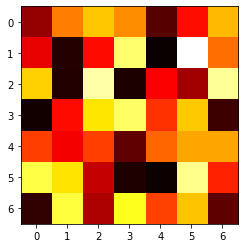

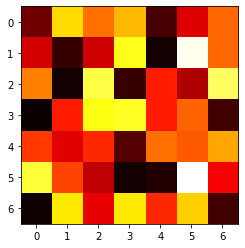

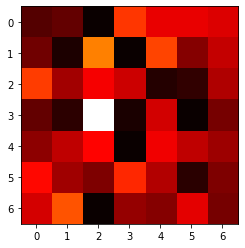

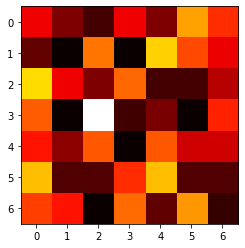

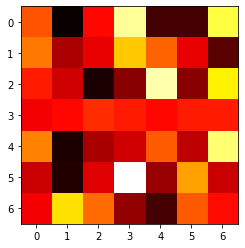

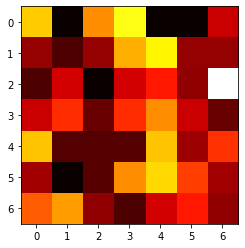

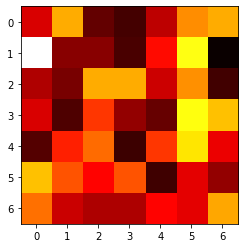

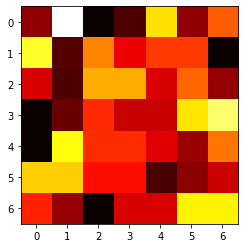

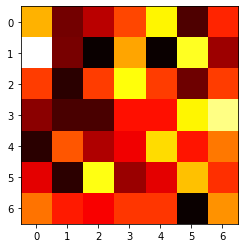

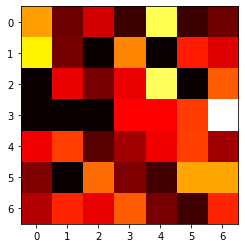

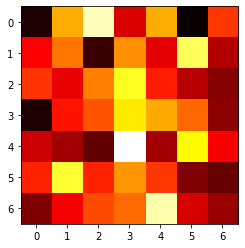

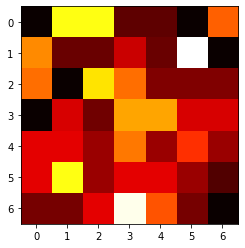

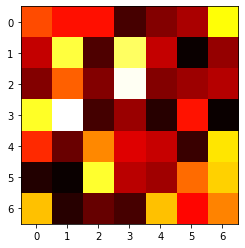

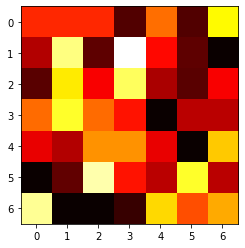

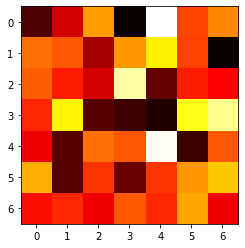

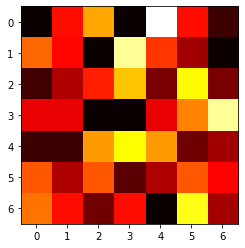

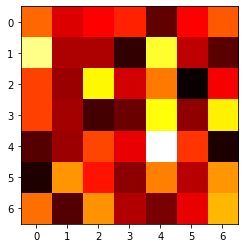

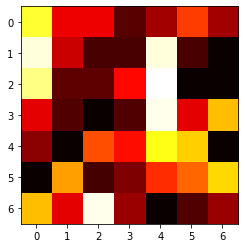

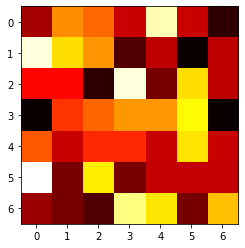

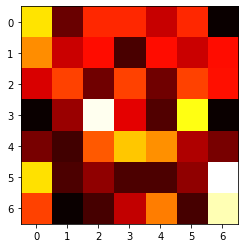

In [8]:
model1=Transition_ModelClass(n_states,10)
model2=Transition_ModelClass(n_states,10)
task_tpl=namedtuple('task',['data'])
task1=task_tpl(df1)
model1.calculate_constant_statistics(task1)
task2=task_tpl(df2)
model2.calculate_constant_statistics(task2)
if 0:
    sim=TotalVariationSimilarity(model1, model2)
else:
    sim=LikelihoodSimilarity(model1, model2)
similarities=[]
show_plots=True
print('class similarity')
for i in range(10):
    sg1=(df1['class']==i).to_numpy()
    fit_result1 = model1.fit(sg1)
    if show_plots:
        plt.imshow(fit_result1.transition_matrix, cmap='hot', interpolation='nearest')
        plt.show()
    sg2=(df2['class']==i).to_numpy()
    fit_result2 = model2.fit(sg2)
    if show_plots:
        plt.imshow(fit_result2.transition_matrix, cmap='hot', interpolation='nearest')
        plt.show()
    similarities.append(sim.evaluate(sg1, sg2, fit_result1, fit_result2))
del sg1, sg2, fit_result1, fit_result2
print(similarities)

In [5]:
noise_similarities=[]
print("noise_similarity")
for i in range(10):
    sg1=(df1['Noise_'+str(i)]==1).to_numpy()
    fit_result1 = model1.fit(sg1)
    if show_plots:
        plt.imshow(fit_result1.transition_matrix, cmap='hot', interpolation='nearest')
        plt.show()
    sg2=(df2['Noise_'+str(i)]==1).to_numpy()
    fit_result2 = model2.fit(sg2)
    if show_plots:
        plt.imshow(fit_result2.transition_matrix, cmap='hot', interpolation='nearest')
        plt.show()
    noise_similarities.append(sim.evaluate(sg1, sg2, fit_result1, fit_result2))
print(np.array(noise_similarities)/np.array(similarities))

noise_similarity
[4.80033902 0.05313288 0.06601051 0.44226407 0.19435866 0.04854897
 0.07025465 0.06091511 0.04511239 0.07690088]


In [6]:
def get_class():
    print('class exceptionality')
    average1=[]
    average2=[]
    for i in range(10):
        stats=L_hood1.calculate_statistics((df1['class']==i).to_numpy())
        value=L_hood1.evaluate(None, stats)
        average1.append(value)
        #print('polluted_exc:', value)
        stats=L_hood2.calculate_statistics((df2['class']==i).to_numpy())
        value=L_hood2.evaluate(None, stats)
        average2.append(value)
        #print('polluted_exc:', value)
        #print()
    print(np.mean(np.log10(average1)))
    print(np.mean(np.log10(average2)))
def get_polluted_class():
    print('polluted exceptionality')
    average1=[]
    average2=[]
    for i in range(1,10):
        stats=L_hood1.calculate_statistics((df1['class_'+str(i)+'_0']==1).to_numpy())
        value=L_hood1.evaluate(None, stats)
        average1.append(value)
        #print('polluted_exc:', value)
        stats=L_hood2.calculate_statistics((df2['class_'+str(i)+'_0']==1).to_numpy())
        value=L_hood2.evaluate(None, stats)
        average2.append(value)
        #print('polluted_exc:', value)
        #print()
    print(np.mean(np.log10(average1)))
    print(np.mean(np.log10(average2)))
def get_noise():
    print('noise exceptionality')
    average1=[]
    average2=[]
    for i in range(1,10):
        stats=L_hood1.calculate_statistics((df1['Noise_'+str(i)]==1).to_numpy())
        value=L_hood1.evaluate(None, stats)
        average1.append(value)
        #print('polluted_exc:', value)
        stats=L_hood2.calculate_statistics((df2['Noise_'+str(i)]==1).to_numpy())
        value=L_hood2.evaluate(None, stats)
        average2.append(value)
        #print('polluted_exc:', value)
        #print()
    print(np.log10(np.mean(average1)))
    print(np.log10(np.mean(average2)))

In [7]:
use_likelihood=True
use_size_wrapper=False
gamma=1
if use_likelihood:
    L_hood1=EMM_Likelihood(model1)
    L_hood2=EMM_Likelihood(model2)
else:
    L_hood1=EMM_TotalVariation(10)
    L_hood2=EMM_TotalVariation(10)
if use_size_wrapper:
    L_hood1=SizeWrapper(L_hood1, gamma)
    L_hood2=SizeWrapper(L_hood2, gamma)
L_hood1.calculate_constant_statistics(task1)
L_hood2.calculate_constant_statistics(task2)
get_class()
get_polluted_class()
get_noise()

class exceptionality
-4.879826298683546
-4.24737458057987
polluted exceptionality
nan
-5.7648982638072495
noise exceptionality
-6.063258252863919
-6.078741356013869
/home/felixstamm/anaconda3/envs/pysubgroup_env/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10
